# Практическая работа №1: Название работы

Выполнил студент гр. 1304 Андреев Вячеслав. Вариант №27.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Используемые обосначения: \
$\lambda(n) = \lfloor \log_{2}(n) \rfloor$ --- (длина бинарной записи n) - 1 \
$\nu(n)$ --- вес Хэмминга, число единиц в бинарной записи n

### Бинарный метод SX

Алгоритм для возведения числа $x$ в степень $n$ бинарным методом "SX":
<ol>
    <li>Запишем $n$ в бинарном виде $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, $a_{m} = 1$</li>
    <li>В полученной записи отбросим старший бит</li>
    <li>Произведем замены в записи:<br>
        $a_{i} = 1 \Rightarrow a_{i} = SX$<br>
        $a_{i} = 0 \Rightarrow a_{i} = S$
    <li>Выполним вычисления:<br>
        result = $x$ <br>
        Идём по преобразованной записи $n$:<br>
        $a_{i} = S \Rightarrow result = result ^ 2$<br>
        $a_{i} = X \Rightarrow result = result * x$
    </li>
</ol>
Число операций для бинарного метода $SX = \lambda(n) + \nu(n) - 1$
    
### Бинарный метод возведения справа налево 
Алгоритм для возведения числа $x$ в степень $n$ методом справа налево:
<ol>
    <li>Начальные значения:<br>
        $N = n$<br> 
        $Y = 1$<br>
        $Z = x$
    </li>
    <li>$N$ чётно?<br>
        дa) переходим на пункт 3<br>
        нет) переходим на пункт 4
    </li>
    <li>$N = \lfloor N/2 \rfloor$<br>
        $Z = Z * Z$<br>
        переходим на пункт 2
    </li>
    <li>$N = \lfloor N/2 \rfloor$<br>
        $Y = Z * Y$
    </li>
    <li>$N == 0$?<br>
        да) $Y$ - ответ и выходим из алгоритма<br>
        нет) $Z = Z * Z$ и переходим на пункт 2
    </li>
</ol>
Число операций для бинарного метода справа налево $ = \lambda(n) + \nu(n)$

### Метод простых множителей
Алгоритм для возведения числа $x$ в степень $n$ методом множителей:
<ol>
    <li>Представим $n$ как $n = p * q$, где<br>
        $p$ - наименьший простой множитель $n$,<br>
        $q > 1$.<br>
        $x^n = (x^p)^q$
    </li>
    <li>Если $n$ - простое, то $x^n = x^{n-1} * x$</li>
    <li>Если $n = 1$, то $x^n = x$</li>
</ol>
Таким образом можно на любом шаге раскладывать $p$, тем самым вычисляя $x^n$.

### Дерево степеней
Алгоритм построения дерева степеней до $k$-го уровня:
<ol>
    <li>Корень дерева $ = 1$ $(k = 0)$.</li>
    <li>Уровень $k+1$: для каждого узла $n$ на $k$-м уровне слева направо присоединяем узлы, которые образуют путь от корня до $n$ $(n+a_{1}, ..., n+a_{k})$</li>
    <li>Если узел уже есть в дереве, то он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод SX
Функция *SxMethod* принимает на вход:<br>
*arg* - выражение для возведения в степень.<br>
*n* - целую степень, в которую нужно возвести *arg*.<br>

В ходе работы алгоритм выводит полученный "SX" формат и значение выражения на каждой итерации.

In [32]:
# create needed variables
var('x')

x

In [33]:
def SxMethod(arg, n):
    if n < 1:
        return 1
    BinaryN = str(bin(n))[3:] # remove first bit and added str convertion chars
    SXStr = BinaryN.replace('1','SX').replace('0', 'S') # convert binary format into SX format
    print(SXStr)
        
    # process SX method
    LResult = arg
    for i in range(len(SXStr)):
        if SXStr[i] == 'X':
            LResult *= arg
        else:
            LResult ^= 2
        print(i, " : ", LResult)
    return LResult

In [34]:
print(SxMethod(x, 18))

SSSXS
0  :  x^2
1  :  x^4
2  :  x^8
3  :  x^9
4  :  x^18
x^18


In [75]:
print(SxMethod(x, 69))

SSSSXSSX
0  :  x^2
1  :  x^4
2  :  x^8
3  :  x^16
4  :  x^17
5  :  x^34
6  :  x^68
7  :  x^69
x^69


In [76]:
print(SxMethod(x, 28))

SXSXSS
0  :  x^2
1  :  x^3
2  :  x^6
3  :  x^7
4  :  x^14
5  :  x^28
x^28


Сравним полученные результаты с теоретическими положениями:<br>
$n = 18 \Rightarrow \lambda(n) = \lfloor \log_{2}(n) \rfloor = 4; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 5$<br>
$n = 69 \Rightarrow \lambda(n) = \lfloor \log_{2}(n) \rfloor = 6; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 8$<br>
$n = 28 \Rightarrow \lambda(n) = \lfloor \log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 6$<br>

Теоретические положения совпали с результатом работы алгоритма.

#### Вывод
Реализован бинарный метод "SX", проведено тестирование алгоритма. Теоретические положения о количестве операций совпали с практической работой алгоритма. Данный метод довольно прост в реализации, кроме того можно легко узнать, за сколько итераций будет произведён расчёт.

### 2. Бинарный метод возведения справа налево
Функция *RightToLeftMethod* принимает на вход:<br>
*arg* - выражение для возведения в степень.<br>
*n* - целую степень, в которую нужно возвести *arg*.<br>

Сначала алгоритм производит инициализацию, согласно пункту 1.<br>
В ходе работы алгоритм выводит промежуточные значения N, Y, Z на каждой итерации.

In [37]:
def RightToLeftMethod(arg, n):
    # init algorithm
    N = n
    Y = 1
    Z = arg
    Iteration = 0
    
    #process right to left method
    while N != 0:
        print("{Iteration}: N = {N} Y = {Y} Z = {Z}".format(Iteration = str(Iteration), N = str(N), Y = str(Y), Z = str(Z)))
        if N % 2 == 0:
            N = floor(N / 2)
            Z *= Z
        else:
            N = floor(N / 2)
            Y *= Z
            Z *= Z
        Iteration += 1   
    print("{Iteration}: N = {N} Y = {Y} Z = {Z}".format(Iteration = str(Iteration), N = str(N), Y = str(Y), Z = str(Z)))
    return Y

In [38]:
print(RightToLeftMethod(x, 18))

0: N = 18 Y = 1 Z = x
1: N = 9 Y = 1 Z = x^2
2: N = 4 Y = x^2 Z = x^4
3: N = 2 Y = x^2 Z = x^8
4: N = 1 Y = x^2 Z = x^16
5: N = 0 Y = x^18 Z = x^32
x^18


Результат работы алгоритма для n = 18:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     18     |      1     |       $x$  |
|      1     |      9     |      1     |   $x^{2}$  |
|      2     |      4     |   $x^{2}$  |   $x^{4}$  |
|      3     |      2     |   $x^{2}$  |   $x^{8}$  |
|      4     |      1     |   $x^{2}$  |   $x^{16}$ |
|      5     |      0     |   $x^{18}$ |   $x^{32}$ |

In [39]:
print(RightToLeftMethod(x, 69))

0: N = 69 Y = 1 Z = x
1: N = 34 Y = x Z = x^2
2: N = 17 Y = x Z = x^4
3: N = 8 Y = x^5 Z = x^8
4: N = 4 Y = x^5 Z = x^16
5: N = 2 Y = x^5 Z = x^32
6: N = 1 Y = x^5 Z = x^64
7: N = 0 Y = x^69 Z = x^128
x^69


Результат работы алгоритма для n = 69:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     69     |      1     |       $x$  |
|      1     |     34     |     $x$    |   $x^{2}$  |
|      2     |     17     |     $x$    |   $x^{4}$  |
|      3     |      8     |   $x^{5}$  |   $x^{8}$  |
|      4     |      4     |   $x^{5}$  |   $x^{16}$ |
|      5     |      2     |   $x^{5}$  |   $x^{32}$ |
|      6     |      1     |   $x^{5}$  |   $x^{64}$ |
|      7     |      0     |   $x^{69}$ |  $x^{128}$ |

In [40]:
print(RightToLeftMethod(x, 28))

0: N = 28 Y = 1 Z = x
1: N = 14 Y = 1 Z = x^2
2: N = 7 Y = 1 Z = x^4
3: N = 3 Y = x^4 Z = x^8
4: N = 1 Y = x^12 Z = x^16
5: N = 0 Y = x^28 Z = x^32
x^28


Результат работы алгоритма для n = 28

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     28     |      1     |       $x$  |
|      1     |     14     |      1     |   $x^{2}$  |
|      2     |      7     |      1     |   $x^{4}$  |
|      3     |      3     |   $x^{4}$  |   $x^{8}$  |
|      4     |      1     |  $x^{12}$  |   $x^{16}$ |
|      5     |      0     |  $x^{28}$  |   $x^{32}$ |

Сравним полученные результаты с теоретическими положениями:<br>
$n = 18 \Rightarrow \lambda(n) = \lfloor \log_{2}(n) \rfloor = 4; \nu(n) = 2; \lambda(n) + \nu(n) = 6$<br>
$n = 69 \Rightarrow \lambda(n) = \lfloor \log_{2}(n) \rfloor = 6; \nu(n) = 3; \lambda(n) + \nu(n) = 9$<br>
$n = 28 \Rightarrow \lambda(n) = \lfloor \log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) = 7$<br>

Теоретические положения совпали с результатом работы алгоритма.

#### Вывод
Реализован бинарный метод возведения справа налево, проведено тестирование алгоритма. Теоретические положения о количестве операций совпали с практической работой алгоритма. Данный метод является менее простым для понимания, нежели метод возведения "SX", кроме того он требует на одну итерацию больше, что подтверждено на практике. Число итераций, за сколько будет произведён расчёт, можно также легко подсчитать по формуле.

### 3. Сравнение бинарного метода "SX" и метода возведения справа налево

Число операций в методе справа налево больше, чем в методе "SX". 
Число итераций в методе справа налево можно оценить как $\lfloor \log_{2}(n) \rfloor + 2$. В методе "SX" же число итераций равно $\lambda(n) + \nu(n) - 1$.
Таким образом, бинарный метод "SX" выгоднее метода возведения справа налево.

### 4. Метод множителей

Проведем работу метода множителей вручную для $n = 18, n = 69, n = 28$.

#### Метод множителей для n = 18:

$x^{18} = (x^{9})^{2}$<br>
$x^{9} = (x^{3})^{3}$<br>
$x^{3} = x * x^{2}$<br>

$x^{3} \rightarrow x, x^{2}, x^{3}$ (2 операции)<br>
$x^{9} \rightarrow x^{3}, (x^{3})^{2}, (x^{3})^{3}$ (2 операции)<br>
$x^{18} \rightarrow x^{9}, (x^{9})^{2}$ (1 операция)<br>

Итого 5 операций.<br>
Данный пример демонстрирует, что метод множителей может работать также как и метода "SX".<br>
И быстрее метода возведения в степень справа налево (за 6 операций).

#### Метод множителей для n = 69:

$x^{69} = (x^{23})^{3}$<br>
$x^{23} = x * x^{22}$<br>
$x^{22} = (x^{11})^{2}$<br>
$x^{11} = x * x^{10}$<br>
$x^{10} = (x^{5})^{2}$<br>
$x^{5} = x * x^{4}$<br>
$x^{4} = (x^{2})^{2}$<br>

$x^{4} \rightarrow x, x^{2}, x^{4}$ (2 операции)<br>
$x^{5} \rightarrow x^{4}, x^{5}$ (1 операция)<br>
$x^{10} \rightarrow x^{5}, x^{10}$ (1 операция)<br>
$x^{11} \rightarrow x^{10}, x^{11}$ (1 операция)<br>
$x^{22} \rightarrow x^{11}, x^{22}$ (1 операция)<br>
$x^{23} \rightarrow x^{22}, x^{23}$ (1 операция)<br>
$x^{69} \rightarrow x^{23}, (x^{23})^{2}, (x^{23})^{3}$ (2 операции)<br>

Итого 9 операций.<br>
Данный пример демонстрирует, что метод множителей может работать медленнее метода "SX"(8 операций).<br>
И также как и метод возведения в степень справа налево.

#### Метод множителей для n = 28:

$x^{28} = (x^{14})^{2}$<br>
$x^{14} = (x^{7})^{2}$<br>
$x^{7} = x * x^{6}$<br>
$x^{6} = (x^{3})^{2}$<br>
$x^{3} = x * x^{2}$<br>

$x^{3} \rightarrow x, x^{2}, x^{3}$ (2 операции)<br>
$x^{6} \rightarrow x^{3}, x^{6} $ (1 операция)<br>
$x^{7} \rightarrow x^{6}, x^{7}$ (1 операция)<br>
$x^{14} \rightarrow x^{7}, x^{14}$ (1 операция)<br>
$x^{28} \rightarrow x^{14}, x^{28}$ (1 операция)<br>

Итого 6 операций.<br>

#### Метод множителей для n = 15:

$x^{15} = (x^{5})^{3}$<br>
$x^{5} = x * x^{4}$<br>

$x^{5} \rightarrow x, x^{2}, x^{4}, x^{5}$ (3 операции)<br>
$x^{15} \rightarrow x^{5}, x^{10}, x^{15} $ (2 операция)<br>

Итого 5 операций.<br>
Данный пример демонстрирует, что метод множителей может работать быстрее метода "SX"(6 операций).

In [41]:
print(SxMethod(x, 15))

SXSXSX
0  :  x^2
1  :  x^3
2  :  x^6
3  :  x^7
4  :  x^14
5  :  x^15
x^15


#### Вывод

Рассмотрен метод множителей для некоторых n. Алгоритм довольно наглядный, что позволяет легко посчитать количество операций для возведения числа в степень "руками". Метод множителей может быть быстрее, чем метод "SX", но иногда может проигрывать другим методам. Метод множителей довольно сложен в реализации.

### 5. Построение дерева степеней

Функция *GetNodeWithAllParents* возвращает список всех родителей данного узла в порядке от корня до текущего (включая его).<br>
Принимает на вход:<br>
*Tree* - дерево, в котором расположен узел.<br>
*Node* - Узел, для которого нужно построить список родителей.<br>

Функция *GetPathToNodeEdges* возвращает путь до данного узла в виде списка ребер.<br>
Принимает на вход:<br>
*Tree* - дерево, в котором расположен узел.<br>
*Node* - Узел, для которого нужно построить список ребер.<br>

Функция *CreateTree* строит дерево до указанного уровня.<br>
Принимает на вход:<br>
*Level* - уровень, до которого строить дерево.<br>

Реализайия алгоритма построения дерева степеней:
- Для хранения дерева используется словарь вида {узел: список родителей}.
- Перебираются уровни от 0 до *Level*, где просматриваются все возможные новые элементы, которые можно вставить на следующий уровень. 
- Элемент добавляется, если его еще не было в дереве.


Функция *PlotTree* выводит на экран дерево с отображением пути от корня до указанного узла.<br>
Принимает на вход:<br>
*Tree* - дерево, в котором расположен узел.<br>
*PathEndNode* - Узел конца пути.<br>

In [44]:
def GetNodeWithAllParents(Tree, Node):
    LResult = [Node]
    while Node != 1:
        Node = Tree[Node][0]
        LResult.append(Node)
    return LResult[::-1] # reverse to have sequence start from root

def GetPathToNodeEdges(Tree, Node):
    LParentsList = GetNodeWithAllParents(Tree, Node)
    LResult = []
    for i in range(len(LParentsList) - 1):
        LResult.append((LParentsList[i], LParentsList[i + 1]))
    return LResult

def CreateTree(Level):
    LTree = {1:[]} 
    LLevelNodes = [1]
    for l in range(Level):
        LNextLevelNodes = []
        for LNode in LLevelNodes:
            for LParentNode in GetNodeWithAllParents(LTree, LNode):
                LNewNode = LNode + LParentNode
                if LNewNode in LTree:
                    continue
                LTree[LNewNode] = [LNode]
                LNextLevelNodes.append(LNewNode)
        LLevelNodes = LNextLevelNodes
    return LTree

def PlotTree(Tree, PathEndNode):
    P = Graph(Tree).plot(layout = 'tree', tree_root = 1, vertex_color = 'white', by_component = True, edge_colors={(1, 0, 1): GetPathToNodeEdges(Tree, PathEndNode)})
    P.show()

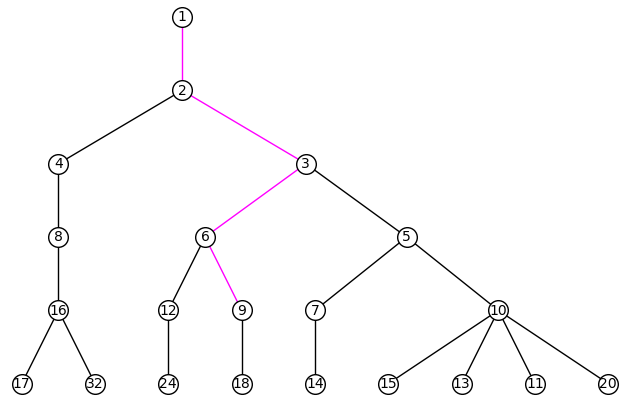

In [49]:
PlotTree(CreateTree(5), 9)

In [54]:
print(GetNodeWithAllParents(CreateTree(5), 9))

[1, 2, 3, 6, 9]


Цепочка: $x, x^{2}, x^{3}, x^{6}, x^{9}$.

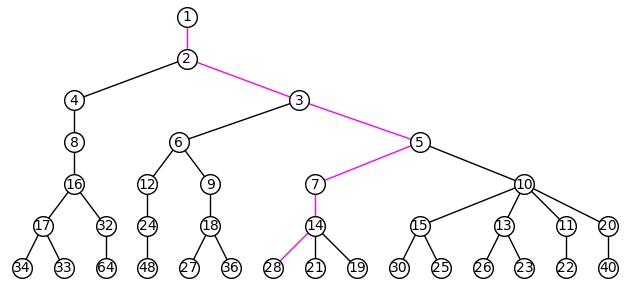

In [58]:
PlotTree(CreateTree(6), 28)

In [59]:
print(GetNodeWithAllParents(CreateTree(6), 28))

[1, 2, 3, 5, 7, 14, 28]


Цепочка: $x, x^{2}, x^{3}, x^{5}, x^{7}, x^{14}, x^{28}$.

Сравним метод "дерева степеней" с методом "SX". 
Для этого подсчитаем количество операций умножения для обоих методов.

In [69]:
def GetSXOperationsCount(n):
    LLambda = floor(log(n, 2))
    LMu = bin(n)[2:].count('1')
    return LLambda + LMu - 1


def GetTreeOperationsCount(SearchNode):
    LTree = {1:[]} 
    LLevelNodes = [1]
    LOperationsCount = 0
    while not SearchNode in LTree:
        LOperationsCount += 1
        LNextLevelNodes = []
        for LNode in LLevelNodes:
            for LParentNode in GetNodeWithAllParents(LTree, LNode):
                LNewNode = LNode + LParentNode
                if LNewNode == SearchNode:
                    return LOperationsCount
                if LNewNode in LTree:
                    continue
                LTree[LNewNode] = [LNode]
                LNextLevelNodes.append(LNewNode)
        LLevelNodes = LNextLevelNodes
    return LOperationsCount

Проверим, что дерево степеней не хуже бинарного метода до $n = 7000$.

In [70]:
IsCorrect = True
for i in range(2, 7000):
    if GetSXOperationsCount(i) < GetTreeOperationsCount(i):
        IsCorrect = False
        break

if IsCorrect:
    print("Good")
else:
    print("Bad")

Good


#### Вывод

Реализован алгоритм "дерева степеней". Полученное дерево было визуализированно при помощи SageMath до заданного уровня, с выделением цветом пути от корня до заданного узла. Данный метод не проигрывает методу "SX" до $n = 7000$, а значит и не проигрывает бинарному методу возведения справа налево. Кроме того, метод дерева степеней требует меньше операций умножения по сравнению с методом множителей.

### 6. Изменённое дерево степеней

Для получения дерева убывающих степеней сделаем так, чтобы узлы, расположенные ниже узла $i$, присоединялись в порядке убывания:<br>
$i+a_{k-1}, ..., i+a_{1},i+a_{0}$<br>
Для этого достаточно модифицировать функцию *GetNodeWithAllParents*.

In [71]:
def GetNodeWithAllParents(Tree, Node):
    LResult = [Node]
    while Node != 1:
        Node = Tree[Node][0]
        LResult.append(Node)
    return LResult

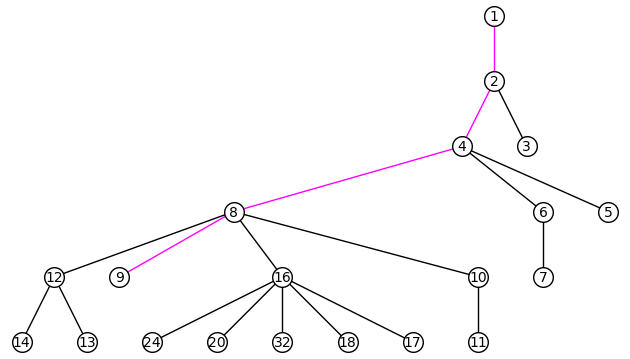

In [72]:
PlotTree(CreateTree(5), 9)

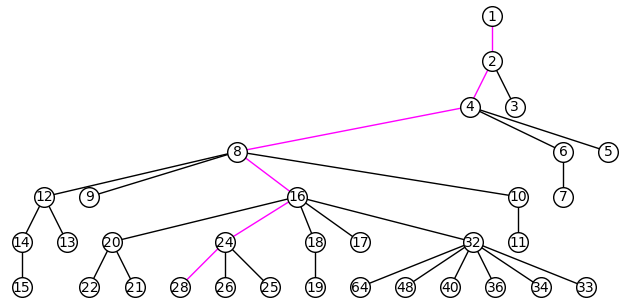

In [73]:
PlotTree(CreateTree(6), 28)

Проверим, что изменённое дерево степеней требует столько же операций умножений, сколько и бинарный метод до $n = 7000$.

In [74]:
IsCorrect = True
for i in range(2, 7000):
    if GetSXOperationsCount(i) != GetTreeOperationsCount(i):
        IsCorrect = False
        break

if IsCorrect:
    print("Good")
else:
    print("Bad")

Good


## Выводы

В ходе практической работы были сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций. Был привит навык использования системы компьютерной алгебры *SageMath* для реализации алгоритмов.<br>
Реализован бинарный метод "SX", бинарный метод возведения в степень справа налево, рассмотрен метод множителей и реализован алгоритм "дерева степеней". Произведены тесты алгоритмов и сравнение с теоретическими положениями.<br>
Также алгоритмы были сравнены друг с другом.